<a href="https://colab.research.google.com/github/Ochan-LOKIDORMOI/alu-machine_learning/blob/master/math/summative/linear_regression/Students_Performance_Index_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Student Performance Dataset is  designed to examine the factors influencing academic students performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.**

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading the data

In [4]:
# Load the data
data = pd.read_csv('Student_Performance.csv')

In [5]:
# Display the first few rows of the data
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


# Data exploration

In [6]:
# get to see the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# Drop the specified columns)

In [8]:
 #Display the first few rows of the processed data
print(data.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [9]:
# get the statistical describe of the data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#**Targetting the features for prediction**


In [10]:
# Features and target variable
# Separate features and target variable
X = data.drop(columns=['Performance Index', 'Extracurricular Activities'])
y = data['Performance Index']
print(X)
print(y)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  
0                                    1  
1                                    2  
2                                    2  
3                                    2  
4                                    5  
...                                ...  
9995                                 2  
9996                               

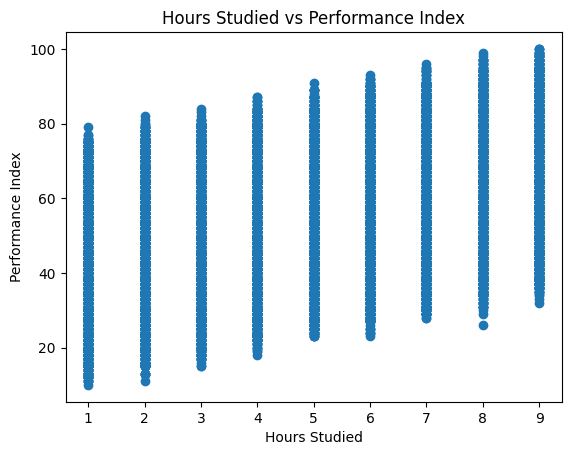

In [19]:
#Scatter plot
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()

# **Traing the model and Initializing the LinearRegression**

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# **Predict the values and compare them to the original values**

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())


      Actual  Predicted
6252    51.0  55.007864
4684    20.0  22.314446
1731    46.0  47.594047
4742    28.0  30.975972
4521    41.0  43.314711


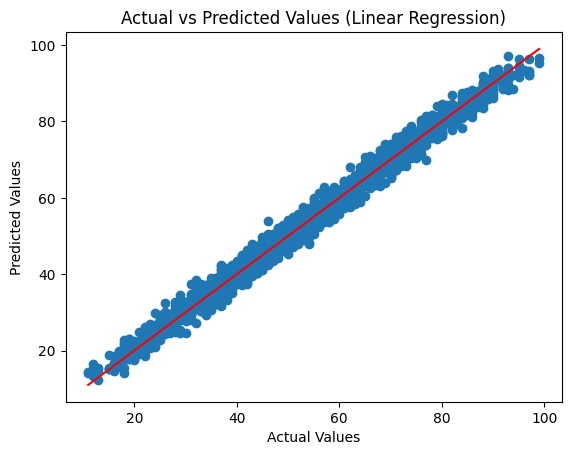

In [15]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')

# Add a line showing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()


# **The accuracy of my model in percentage**

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

accuracy_percentage = r2 * 100
print('Accuracy: {:.2f}%'.format(accuracy_percentage))


Mean Squared Error: 4.182254914593815
Root Mean Squared Error: 2.045056213064525
R-squared: 0.9887144552384186
Accuracy: 98.87%


# **Description of the above performance metrics:**

## **1. Mean Squared Error (MSE)**
###   A lower MSE indicates that the predicted values are closer to the actual values. In this case, an MSE of approximately 4.18 means that, on average, the squared difference between the actual and predicted values is about 4.18.

## **2. Root Mean Squared Error (RMSE)**
###  An RMSE of approximately 2.05 means that, on average, the predicted values deviate from the actual values by about 2.05 units. Like MSE, a lower RMSE indicates better model performance.

## **3. R-squared (R²)**

### An R-squared **(Coefficient determination)**value of approximately 0.99 means that 98.87% of the variance in the target variable can be explained by the model. This indicates a very high level of accuracy in the model's predictions.

## **4. Accuracy: 98.87%**

### An accuracy of 98.87% indicates that the model is highly accurate, correctly predicting the target variable with very little error.

In [17]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']